In [ ]:
import pandas as pd
import numpy as np

Data Preprocessing

In [ ]:
data=pd.read_csv("flipkart_product.csv", encoding='latin1')
print(data.head(10))

                                         ProductName     Price  Rate  \
0  Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  ??3,999   5.0   
1  Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  ??3,999   5.0   
2  Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  ??3,999   3.0   
3  Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  ??3,999   1.0   
4  Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  ??3,999   3.0   
5  Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  ??3,999   5.0   
6  Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  ??3,999   5.0   
7  Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  ??3,999   3.0   
8  Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  ??3,999   1.0   
9  Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  ??3,999   4.0   

               Review                                            Summary  
0              Super!  Great cooler.. excellent air flow and for this...  
1             Awesome             Best budget 2 fit coole

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33252 entries, 0 to 33251
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductName  33252 non-null  object 
 1   Price        33251 non-null  object 
 2   Rate         33251 non-null  float64
 3   Review       33251 non-null  object 
 4   Summary      33248 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1.3+ MB


In [ ]:
data.isnull().sum()

,0
ProductName,0
Price,1
Rate,1
Review,1
Summary,4


In [ ]:
print(data['Price'])

0         ??3,999
1         ??3,999
2         ??3,999
3         ??3,999
4         ??3,999
           ...    
33247    ??29,990
33248    ??29,990
33249    ??29,990
33250    ??29,990
33251          NaN
Name: Price, Length: 33252, dtype: object


In [ ]:
data.nunique()

,0
ProductName,145
Price,107
Rate,5
Review,184
Summary,18199


In [ ]:
def check_price(price):
    try:
        float(price.replace('₹', '').replace(',', ''))
        return True
    except:
        return False
problematic_prices = data[~(data['Price'].apply(check_price))]
print(problematic_prices['Price'])

0         ??3,999
1         ??3,999
2         ??3,999
3         ??3,999
4         ??3,999
           ...    
33247    ??29,990
33248    ??29,990
33249    ??29,990
33250    ??29,990
33251          NaN
Name: Price, Length: 33252, dtype: object


In [ ]:
import re
import time
def clean_price(price):
    if(pd.isna(price)):
        return None
    else:
        price=str(price).replace('₹', '').replace(',', '')
        cleaned_price=re.search(r'\d+\.?\d*', price)
        cleaned_price = cleaned_price.group(0) if cleaned_price else None
        return cleaned_price if cleaned_price else None

data['Cleaned_Price'] = data['Price'].apply(clean_price)
print(data['Cleaned_Price'].head(10))

0    3999
1    3999
2    3999
3    3999
4    3999
5    3999
6    3999
7    3999
8    3999
9    3999
Name: Cleaned_Price, dtype: object


In [ ]:
data['Cleaned_Price'].to_csv("cleaned_prices.csv", index=False)

In [ ]:
data.head()

,ProductName,Price,Rate,Review,Summary,Cleaned_Price
0,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5.0,Super!,Great cooler.. excellent air flow and for this...,3999
1,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5.0,Awesome,Best budget 2 fit cooler. Nice cooling,3999
2,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3.0,Fair,The quality is good but the power of air is de...,3999
3,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",1.0,Useless product,Very bad product it's a only a fan,3999
4,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3.0,Fair,Ok ok product,3999


In [ ]:
data['Cleaned_Price'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 33252 entries, 0 to 33251
Series name: Cleaned_Price
Non-Null Count  Dtype 
--------------  ----- 
33251 non-null  object
dtypes: object(1)
memory usage: 259.9+ KB


In [ ]:
data.isnull().sum()

,0
ProductName,0
Price,1
Rate,1
Review,1
Summary,4
Cleaned_Price,1


In [ ]:
data['Cleaned_Price'].isnull()

,Cleaned_Price
0,False
1,False
2,False
3,False
4,False
...,...
33247,False
33248,False
33249,False
33250,False


In [ ]:
data

,ProductName,Price,Rate,Review,Summary,Cleaned_Price
0,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5.0,Super!,Great cooler.. excellent air flow and for this...,3999
1,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5.0,Awesome,Best budget 2 fit cooler. Nice cooling,3999
2,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3.0,Fair,The quality is good but the power of air is de...,3999
3,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",1.0,Useless product,Very bad product it's a only a fan,3999
4,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3.0,Fair,Ok ok product,3999
...,...,...,...,...,...,...
33247,Faber FFSD 6PR 12S Neo Free Standing 12 Place ...,"??29,990",1.0,Did not meet expectations,After a week we find a huge leakage of water f...,29990
33248,Faber FFSD 6PR 12S Neo Free Standing 12 Place ...,"??29,990",4.0,Very Good,Product is working very good. I am very much s...,29990
33249,Faber FFSD 6PR 12S Neo Free Standing 12 Place ...,"??29,990",5.0,Mind-blowing purchase,Faber has provided an amazing product and demo...,29990
33250,Faber FFSD 6PR 12S Neo Free Standing 12 Place ...,"??29,990",5.0,Fabulous!,Excellent Rahul,29990


In [ ]:
data['Cleaned_Price']=pd.to_numeric(data['Cleaned_Price'])

In [ ]:
print("Rows with Nan after cleaning:", data['Cleaned_Price'].isnull().sum())
data['Cleaned_Price'].describe()

Rows with Nan after cleaning: 1


,Cleaned_Price
count,33251.000000
mean,5153.899823
std,10102.221050
min,59.000000
25%,299.000000
50%,449.000000
75%,4499.000000
max,52990.000000


In [ ]:
data=data.dropna(subset=['Cleaned_Price'])

In [ ]:
data['Price']=data['Cleaned_Price']

<ipython-input-18-2459637827>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Price']=data['Cleaned_Price']


In [ ]:
data.head(10)

,ProductName,Price,Rate,Review,Summary,Cleaned_Price
0,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999.0,5.0,Super!,Great cooler.. excellent air flow and for this...,3999.0
1,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999.0,5.0,Awesome,Best budget 2 fit cooler. Nice cooling,3999.0
2,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999.0,3.0,Fair,The quality is good but the power of air is de...,3999.0
3,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999.0,1.0,Useless product,Very bad product it's a only a fan,3999.0
4,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999.0,3.0,Fair,Ok ok product,3999.0
5,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999.0,5.0,Awesome,The cooler is really fantastic and provides go...,3999.0
6,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999.0,5.0,Highly recommended,Very good product,3999.0
7,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999.0,3.0,Nice,Very nice,3999.0
8,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999.0,1.0,Unsatisfactory,Very bad cooler,3999.0
9,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999.0,4.0,Worth the money,Very good,3999.0


In [ ]:
data.drop('Cleaned_Price', axis=1, inplace=True)

<ipython-input-20-1140691161>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('Cleaned_Price', axis=1, inplace=True)


In [ ]:
data.head(10)

,ProductName,Price,Rate,Review,Summary
0,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999.0,5.0,Super!,Great cooler.. excellent air flow and for this...
1,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999.0,5.0,Awesome,Best budget 2 fit cooler. Nice cooling
2,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999.0,3.0,Fair,The quality is good but the power of air is de...
3,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999.0,1.0,Useless product,Very bad product it's a only a fan
4,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999.0,3.0,Fair,Ok ok product
5,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999.0,5.0,Awesome,The cooler is really fantastic and provides go...
6,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999.0,5.0,Highly recommended,Very good product
7,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999.0,3.0,Nice,Very nice
8,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999.0,1.0,Unsatisfactory,Very bad cooler
9,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999.0,4.0,Worth the money,Very good


In [ ]:
data.isnull().sum()

,0
ProductName,0
Price,0
Rate,0
Review,0
Summary,3


In [ ]:
data=data.dropna(subset=['Summary'])
data['Review']=data['Review'].fillna('No Review found in this')


<ipython-input-23-1980062093>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Review']=data['Review'].fillna('No Review found in this')


In [ ]:
data['Rate']=pd.to_numeric(data['Rate'],errors='coerce')
data.dropna(subset=['Rate'], inplace=True)
data['Rate'] = data['Rate'].astype(int)
data['Rate'].describe()

<ipython-input-24-2699897314>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Rate']=pd.to_numeric(data['Rate'],errors='coerce')
<ipython-input-24-2699897314>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(subset=['Rate'], inplace=True)
<ipython-input-24-2699897314>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

,Rate
count,33248.000000
mean,4.126143
std,1.275799
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
data.isnull().sum()

,0
ProductName,0
Price,0
Rate,0
Review,0
Summary,0


In [ ]:
import re
def clean_text(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)
data['Review'] = data['Review'].apply(clean_text)
data['Review'].head(10)

,Review
0,Super
1,Awesome
2,Fair
3,Useless product
4,Fair
5,Awesome
6,Highly recommended
7,Nice
8,Unsatisfactory
9,Worth the money


In [ ]:
data['ProductName'] = data['ProductName'].apply(clean_text)
data['ProductName'].head(10)
data['Summary'] = data['Summary'].apply(clean_text)
data['Summary'].head(10)

,Summary
0,Great cooler excellent air flow and for this p...
1,Best budget 2 fit cooler Nice cooling
2,The quality is good but the power of air is de...
3,Very bad product its a only a fan
4,Ok ok product
5,The cooler is really fantastic and provides go...
6,Very good product
7,Very nice
8,Very bad cooler
9,Very good


In [ ]:
def lowercase_text(text):
    return text.lower() if isinstance(text, str) else text

In [ ]:
data['ProductName'] = data['ProductName'].apply(lowercase_text)
data['Summary'] = data['Summary'].apply(lowercase_text)
data['Review'] = data['Review'].apply(lowercase_text)
data.head(10)

,ProductName,Price,Rate,Review,Summary
0,candes 12 l roompersonal air coolerwhite black...,3999.0,5,super,great cooler excellent air flow and for this p...
1,candes 12 l roompersonal air coolerwhite black...,3999.0,5,awesome,best budget 2 fit cooler nice cooling
2,candes 12 l roompersonal air coolerwhite black...,3999.0,3,fair,the quality is good but the power of air is de...
3,candes 12 l roompersonal air coolerwhite black...,3999.0,1,useless product,very bad product its a only a fan
4,candes 12 l roompersonal air coolerwhite black...,3999.0,3,fair,ok ok product
5,candes 12 l roompersonal air coolerwhite black...,3999.0,5,awesome,the cooler is really fantastic and provides go...
6,candes 12 l roompersonal air coolerwhite black...,3999.0,5,highly recommended,very good product
7,candes 12 l roompersonal air coolerwhite black...,3999.0,3,nice,very nice
8,candes 12 l roompersonal air coolerwhite black...,3999.0,1,unsatisfactory,very bad cooler
9,candes 12 l roompersonal air coolerwhite black...,3999.0,4,worth the money,very good


In [ ]:
def rate_to_category(rate):
    if rate >= 4:
        return 'positive'
    elif rate == 3:
        return 'neutral'
    else:
        return 'negative'
data['Sentiment_from_rate'] = data['Rate'].apply(rate_to_category)
data['Sentiment_from_rate'].value_counts()

,count
Sentiment_from_rate,
positive,25982
negative,4307
neutral,2959


In [ ]:
data.head()

,ProductName,Price,Rate,Review,Summary,Sentiment_from_rate
0,candes 12 l roompersonal air coolerwhite black...,3999.0,5,super,great cooler excellent air flow and for this p...,positive
1,candes 12 l roompersonal air coolerwhite black...,3999.0,5,awesome,best budget 2 fit cooler nice cooling,positive
2,candes 12 l roompersonal air coolerwhite black...,3999.0,3,fair,the quality is good but the power of air is de...,neutral
3,candes 12 l roompersonal air coolerwhite black...,3999.0,1,useless product,very bad product its a only a fan,negative
4,candes 12 l roompersonal air coolerwhite black...,3999.0,3,fair,ok ok product,neutral


In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

sia= SentimentIntensityAnalyzer()

data['Summary_Sentiment'] = data['Summary'].apply(lambda x: sia.polarity_scores(x)['compound'])

def classify_sentiment(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'
data['Sentiment_from_summary'] = data['Summary_Sentiment'].apply(classify_sentiment)
data['Sentiment_from_summary'].value_counts()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,count
Sentiment_from_summary,
positive,26446
negative,3861
neutral,2941


In [ ]:
data.head(10)

,ProductName,Price,Rate,Review,Summary,Sentiment_from_rate,Summary_Sentiment,Sentiment_from_summary
0,candes 12 l roompersonal air coolerwhite black...,3999.0,5,super,great cooler excellent air flow and for this p...,positive,0.9576,positive
1,candes 12 l roompersonal air coolerwhite black...,3999.0,5,awesome,best budget 2 fit cooler nice cooling,positive,0.8591,positive
2,candes 12 l roompersonal air coolerwhite black...,3999.0,3,fair,the quality is good but the power of air is de...,neutral,0.2382,positive
3,candes 12 l roompersonal air coolerwhite black...,3999.0,1,useless product,very bad product its a only a fan,negative,-0.3597,negative
4,candes 12 l roompersonal air coolerwhite black...,3999.0,3,fair,ok ok product,neutral,0.5267,positive
5,candes 12 l roompersonal air coolerwhite black...,3999.0,5,awesome,the cooler is really fantastic and provides go...,positive,0.8354,positive
6,candes 12 l roompersonal air coolerwhite black...,3999.0,5,highly recommended,very good product,positive,0.4927,positive
7,candes 12 l roompersonal air coolerwhite black...,3999.0,3,nice,very nice,neutral,0.4754,positive
8,candes 12 l roompersonal air coolerwhite black...,3999.0,1,unsatisfactory,very bad cooler,negative,-0.5849,negative
9,candes 12 l roompersonal air coolerwhite black...,3999.0,4,worth the money,very good,positive,0.4927,positive


In [ ]:
compare=pd.crosstab(data['Sentiment_from_rate'], data['Sentiment_from_summary'])
print(compare)

Sentiment_from_summary  negative  neutral  positive
Sentiment_from_rate                                
negative                    3014      838       455
neutral                      518      481      1960
positive                     329     1622     24031


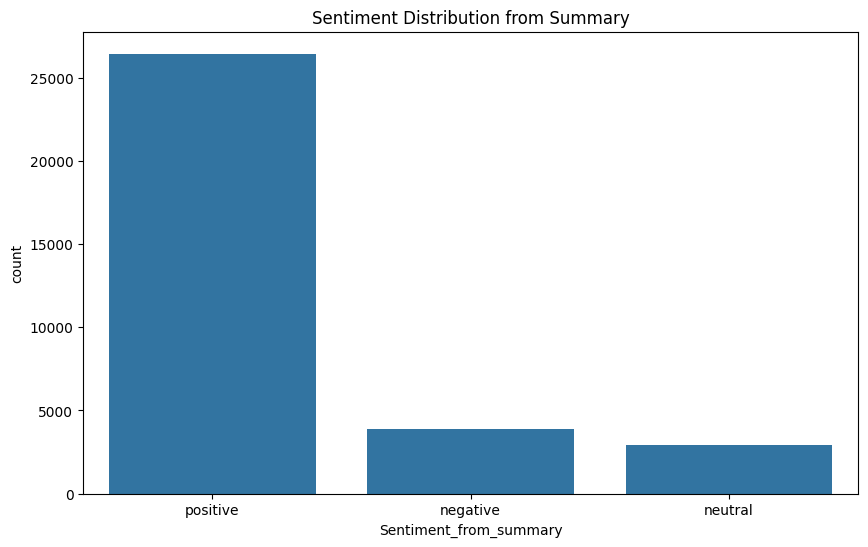

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(x='Sentiment_from_summary', data=data)
plt.title('Sentiment Distribution from Summary')
plt.show()

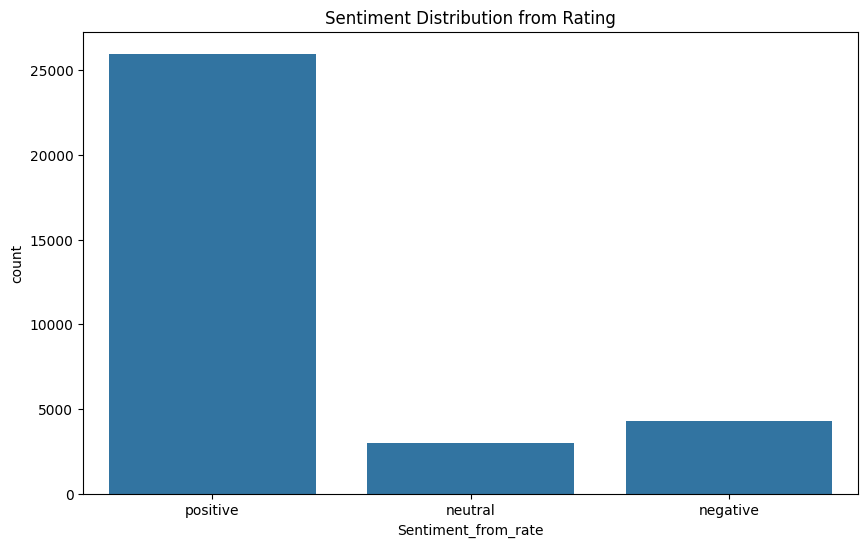

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Sentiment_from_rate', data=data)
plt.title('Sentiment Distribution from Rating')
plt.show()

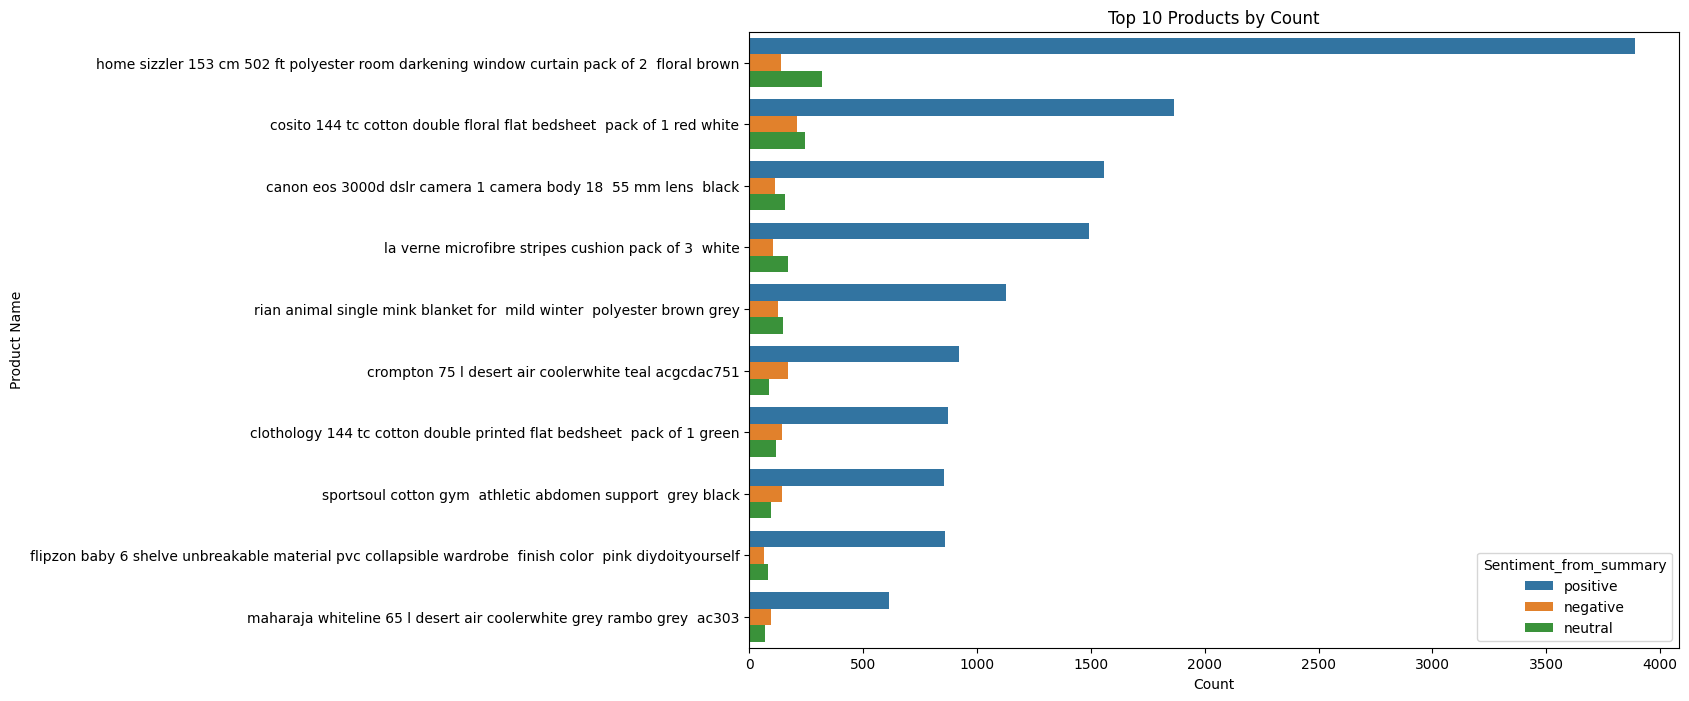

In [ ]:
plt.figure(figsize=(12, 8))
top_products=data['ProductName'].value_counts().index[:10]
top_products_data=data[data['ProductName'].isin(top_products)]
sns.countplot(y='ProductName', hue='Sentiment_from_summary', data=top_products_data, order=top_products_data['ProductName'].value_counts().index)
plt.title('Top 10 Products by Count')
plt.xlabel('Count')
plt.ylabel('Product Name')
plt.show()

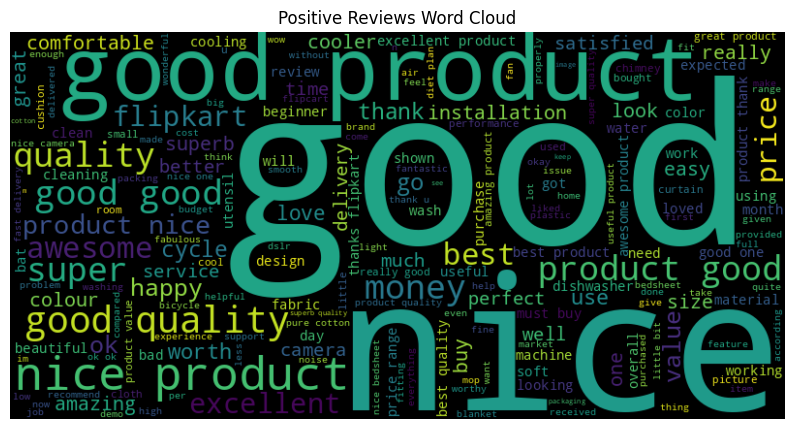

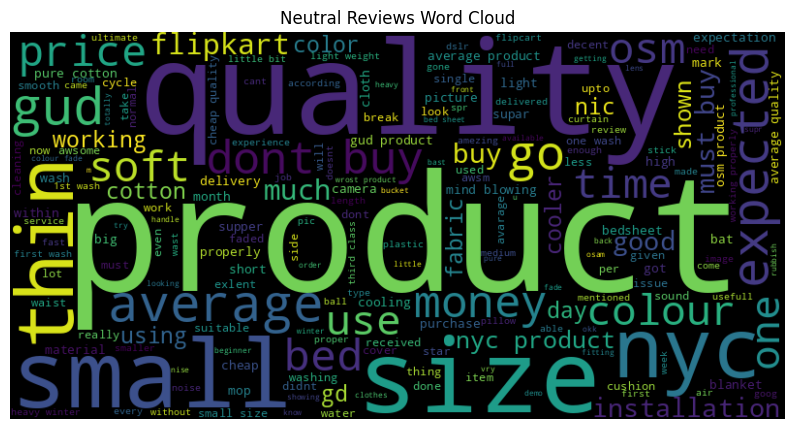

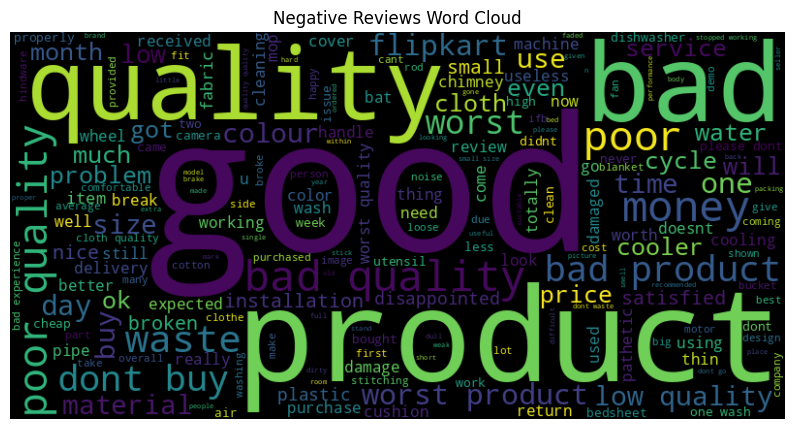

In [ ]:
positive_reviews=' '.join(data[data['Sentiment_from_summary']=='positive']['Summary'])
neutral_reviews=' '.join(data[data['Sentiment_from_summary']=='neutral']['Summary'])
negative_reviews=' '.join(data[data['Sentiment_from_summary']=='negative']['Summary'])

plt.figure(figsize=(10, 6))
wordcloud_positive = WordCloud(width=800, height=400, background_color='black').generate(positive_reviews)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews Word Cloud')
plt.show()

plt.figure(figsize=(10, 6))
wordcloud_neutral = WordCloud(width=800, height=400, background_color='black').generate(neutral_reviews)
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.axis('off')
plt.title('Neutral Reviews Word Cloud')
plt.show()

plt.figure(figsize=(10, 6))
wordcloud_negative = WordCloud(width=800, height=400, background_color='black').generate(negative_reviews)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews Word Cloud')
plt.show()

In [ ]:
data.head(10)

,ProductName,Price,Rate,Review,Summary,Sentiment_from_rate,Summary_Sentiment,Sentiment_from_summary
0,candes 12 l roompersonal air coolerwhite black...,3999.0,5,super,great cooler excellent air flow and for this p...,positive,0.9576,positive
1,candes 12 l roompersonal air coolerwhite black...,3999.0,5,awesome,best budget 2 fit cooler nice cooling,positive,0.8591,positive
2,candes 12 l roompersonal air coolerwhite black...,3999.0,3,fair,the quality is good but the power of air is de...,neutral,0.2382,positive
3,candes 12 l roompersonal air coolerwhite black...,3999.0,1,useless product,very bad product its a only a fan,negative,-0.3597,negative
4,candes 12 l roompersonal air coolerwhite black...,3999.0,3,fair,ok ok product,neutral,0.5267,positive
5,candes 12 l roompersonal air coolerwhite black...,3999.0,5,awesome,the cooler is really fantastic and provides go...,positive,0.8354,positive
6,candes 12 l roompersonal air coolerwhite black...,3999.0,5,highly recommended,very good product,positive,0.4927,positive
7,candes 12 l roompersonal air coolerwhite black...,3999.0,3,nice,very nice,neutral,0.4754,positive
8,candes 12 l roompersonal air coolerwhite black...,3999.0,1,unsatisfactory,very bad cooler,negative,-0.5849,negative
9,candes 12 l roompersonal air coolerwhite black...,3999.0,4,worth the money,very good,positive,0.4927,positive


In [ ]:
data['Sentiment_from_summary'].value_counts()

,count
Sentiment_from_summary,
positive,26446
negative,3861
neutral,2941


In [ ]:
from sklearn.model_selection import train_test_split
df=data[['Summary', 'Sentiment_from_summary']].copy()
label_mapping = {'positive': 2, 'neutral': 1, 'negative': 0}
df['Sentiment_Label'] = df['Sentiment_from_summary'].map(label_mapping)

In [ ]:
train_texts,temp_texts,train_labels,temp_labels=train_test_split(
    df['Summary'],df['Sentiment_Label'],test_size=0.3,stratify=df['Sentiment_Label'],random_state=42)

val_texts,test_texts,val_labels,test_labels=train_test_split(
    temp_texts,temp_labels,test_size=0.5,stratify=temp_labels,random_state=42)
print("Training set size:", len(train_texts))
print("Validation set size:", len(val_texts))
print("Test set size:", len(test_texts))

Training set size: 23273
Validation set size: 4987
Test set size: 4988


In [ ]:
from transformers import BertTokenizer

tokenizer=BertTokenizer.from_pretrained('bert-base-uncased')

train_encodings=tokenizer(list(train_texts),truncation=True,padding=True,max_length=128)
val_encodings=tokenizer(list(val_texts),truncation=True,padding=True,max_length=128)
test_encodings=tokenizer(list(test_texts),truncation=True,padding=True,max_length=128)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
import torch

class SentimeDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = SentimeDataset(train_encodings, list(train_labels))
val_dataset = SentimeDataset(val_encodings, list(val_labels))
test_dataset = SentimeDataset(test_encodings, list(test_labels))

In [ ]:
from transformers import BertForSequenceClassification, Trainer, TrainingArguments
device=torch.cuda.is_available()
if device:
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
print("Using device:", device)
model= BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)
model.to(device)

Using device: cuda


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [ ]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",  # <-- corrected here
    save_strategy="epoch",
    num_train_epochs=5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    logging_dir="./logs",
    logging_steps=10,
)


trainer=Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=None  # You can define a custom metric function if needed
)

trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: mohammedanazar-b22cs1135 (karolmonsytheruvil-b21cs1133-mar-baselios-college-of-eng) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss
1,0.058700,0.104000
2,0.116800,0.075739
3,0.033500,0.096365
4,0.024500,0.099288
5,0.000100,0.107802


TrainOutput(global_step=7275, training_loss=0.05046407498260064, metrics={'train_runtime': 2584.4751, 'train_samples_per_second': 45.025, 'train_steps_per_second': 2.815, 'total_flos': 7116105370344390.0, 'train_loss': 0.05046407498260064, 'epoch': 5.0})

In [ ]:
import torch

print(torch.cuda.is_available())     # Should print: True
print(torch.cuda.device_count())     # Number of GPUs available
print(torch.cuda.get_device_name(0)) # Name of your GPU


True
1
Tesla T4


In [ ]:
trainer.evaluate()

# Get predictions
predictions = trainer.predict(test_dataset)
preds = torch.argmax(torch.tensor(predictions.predictions), dim=1)

# Classification Report
from sklearn.metrics import classification_report
print(classification_report(test_labels, preds))


              precision    recall  f1-score   support

           0       0.97      0.94      0.96       580
           1       0.94      0.96      0.95       441
           2       0.99      0.99      0.99      3967

    accuracy                           0.98      4988
   macro avg       0.97      0.97      0.97      4988
weighted avg       0.98      0.98      0.98      4988



In [ ]:
# Evaluate on training set
train_metrics = trainer.evaluate(train_dataset)
print("Training metrics:", train_metrics)

# Evaluate on validation set (you've already done this)
val_metrics = trainer.evaluate(val_dataset)
print("Validation metrics:", val_metrics)

# Evaluate on test set (you've already done this)
test_metrics = trainer.evaluate(test_dataset)
print("Test metrics:", test_metrics)

# Now, compare the metrics (e.g., loss and accuracy)
# If training loss is much lower than validation and test loss, and accuracy is much higher on training, it's overfitting.
# If training loss is high and accuracy is low, it might be underfitting.

Training metrics: {'eval_loss': 0.005403229966759682, 'eval_runtime': 140.3769, 'eval_samples_per_second': 165.789, 'eval_steps_per_second': 5.186, 'epoch': 5.0}
Validation metrics: {'eval_loss': 0.10780152678489685, 'eval_runtime': 29.816, 'eval_samples_per_second': 167.259, 'eval_steps_per_second': 5.232, 'epoch': 5.0}
Test metrics: {'eval_loss': 0.10470236092805862, 'eval_runtime': 30.3216, 'eval_samples_per_second': 164.503, 'eval_steps_per_second': 5.145, 'epoch': 5.0}


In [3]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch

# Replace with your model path
model_path = "model_bert"

# Load tokenizer and model
tokenizer = BertTokenizer.from_pretrained(model_path)
model = BertForSequenceClassification.from_pretrained(model_path)

# Move model to device (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)
model.to(device)
model.eval()


Using device: cuda


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [4]:
# Map label index to sentiment string
label_map = {0: 'negative', 1: 'neutral', 2: 'positive'}

def predict_sentiment(text_list):
    # Tokenize inputs
    encodings = tokenizer(text_list, truncation=True, padding=True, max_length=128, return_tensors="pt")
    input_ids = encodings['input_ids'].to(device)
    attention_mask = encodings['attention_mask'].to(device)

    # Disable gradient calculation
    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        predictions = torch.argmax(logits, dim=1)

    # Convert label indices to sentiment
    predicted_labels = [label_map[label.item()] for label in predictions]
    return predicted_labels


In [6]:
# Example reviews to classify
sample_reviews = [
    "Amazing product! Fast delivery and works perfectly.",
    "Worst experience ever. Item was broken and late.",
    "Its okay, not what I expected but it works.",
    "Absolutely love it! Exceeded my expectations.",
    "Terrible quality, I would not recommend this to anyone.",
    "Decent product, good for the price."
]

# Get predictions
results = predict_sentiment(sample_reviews)

# Display
for review, sentiment in zip(sample_reviews, results):
    print(f"Review: {review}\nPredicted Sentiment: {sentiment}\n")


Review: Amazing product! Fast delivery and works perfectly.
Predicted Sentiment: positive

Review: Worst experience ever. Item was broken and late.
Predicted Sentiment: negative

Review: Its okay, not what I expected but it works.
Predicted Sentiment: positive

Review: Absolutely love it! Exceeded my expectations.
Predicted Sentiment: positive

Review: Terrible quality, I would not recommend this to anyone.
Predicted Sentiment: negative

Review: Decent product, good for the price.
Predicted Sentiment: positive

